In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df

order_time  order_id  ... session_time cancelled_time
0       2021-01-26 02:21:35    556753  ...          NaN            NaN
1       2021-01-26 02:33:16    556754  ...     3.266667            NaN
2       2021-01-26 02:39:49    556755  ...     9.816667            NaN
3       2021-01-26 02:47:53    556756  ...    17.533333            NaN
4       2021-01-26 03:06:30    556757  ...     1.350000            NaN
...                     ...       ...  ...          ...            ...
449995  2021-02-06 10:03:16    130226  ...   369.516667            NaN
449996  2021-02-06 10:03:17    130227  ...   239.133333            NaN
449997  2021-02-06 10:03:18    130228  ...   204.150000            NaN
449998  2021-02-06 10:03:19    130229  ...    65.583333            NaN
449999  2021-02-06 10:03:24    130230  ...   212.000000            NaN

[450000 rows x 20 columns]

In [ ]:
df.describe()

order_id       rider_id  ...  reassigned_order   session_time
count  450000.000000  450000.000000  ...           13753.0  446325.000000
mean   369143.080767    7763.244016  ...               1.0     220.474779
std    131146.906408    5592.880135  ...               0.0     176.713853
min    118350.000000       0.000000  ...               1.0       0.000000
25%    257342.750000    2805.000000  ...               1.0      84.100000
50%    369842.500000    6754.000000  ...               1.0     175.550000
75%    482342.250000   11965.000000  ...               1.0     316.766667
max    594842.000000   21566.000000  ...               1.0    1298.966667

[8 rows x 11 columns]

In [ ]:
df.dtypes

order_time               object
order_id                  int64
order_date               object
allot_time               object
accept_time              object
pickup_time              object
delivered_time           object
rider_id                  int64
first_mile_distance     float64
last_mile_distance      float64
alloted_orders          float64
delivered_orders        float64
cancelled                 int64
undelivered_orders      float64
lifetime_order_count    float64
reassignment_method      object
reassignment_reason      object
reassigned_order        float64
session_time            float64
cancelled_time           object
dtype: object

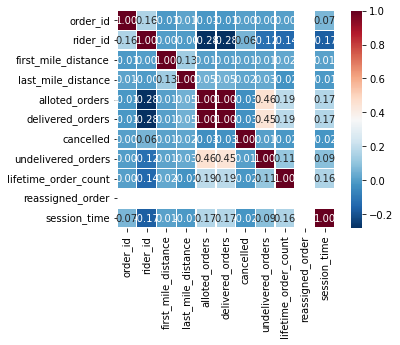

In [ ]:
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f') 
plt.show()

In [ ]:
df['order_id'].unique()

array([556753, 556754, 556755, ..., 130228, 130229, 130230])

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df.dtypes

order_time                      object
order_id                         int64
order_date              datetime64[ns]
allot_time                      object
accept_time                     object
pickup_time                     object
delivered_time                  object
rider_id                         int64
first_mile_distance            float64
last_mile_distance             float64
alloted_orders                 float64
delivered_orders               float64
cancelled                        int64
undelivered_orders             float64
lifetime_order_count           float64
reassignment_method             object
reassignment_reason             object
reassigned_order               float64
session_time                   float64
cancelled_time                  object
dtype: object

In [ ]:
df['Day'] = df['order_date'].dt.day
df['Month'] = df['order_date'].dt.month
df['Year'] = df['order_date'].dt.year

In [ ]:
df.tail()

order_time  order_id order_date  ... Day Month  Year
449995  2021-02-06 10:03:16    130226 2021-02-06  ...   6     2  2021
449996  2021-02-06 10:03:17    130227 2021-02-06  ...   6     2  2021
449997  2021-02-06 10:03:18    130228 2021-02-06  ...   6     2  2021
449998  2021-02-06 10:03:19    130229 2021-02-06  ...   6     2  2021
449999  2021-02-06 10:03:24    130230 2021-02-06  ...   6     2  2021

[5 rows x 23 columns]

In [ ]:
df.drop(columns=['order_id','order_time','allot_time','accept_time','pickup_time','delivered_time','rider_id','reassignment_method','reassignment_reason','reassigned_order','cancelled_time','order_date'],inplace=True)

In [ ]:
df

first_mile_distance  last_mile_distance  ...  Month  Year
0                    1.5666                2.65  ...      1  2021
1                    2.5207                2.76  ...      1  2021
2                    2.2074                4.80  ...      1  2021
3                    2.1894                6.38  ...      1  2021
4                    2.7870                4.01  ...      1  2021
...                     ...                 ...  ...    ...   ...
449995               0.5789                0.19  ...      2  2021
449996               1.9863                1.19  ...      2  2021
449997               1.5944                1.61  ...      2  2021
449998               2.8939                4.68  ...      2  2021
449999               1.8925                0.09  ...      2  2021

[450000 rows x 11 columns]

In [ ]:
df.isna().sum()

first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
cancelled                   0
undelivered_orders      17341
lifetime_order_count       53
session_time             3675
Day                         0
Month                       0
Year                        0
dtype: int64

In [ ]:
df['total_delivery'] = df['delivered_orders']/df['alloted_orders']*100
df['not_delivered'] = df['alloted_orders']-df['delivered_orders']
df['distance'] = df['first_mile_distance']+df['last_mile_distance']

In [ ]:
df

first_mile_distance  last_mile_distance  ...  not_delivered  distance
0                    1.5666                2.65  ...            0.0    4.2166
1                    2.5207                2.76  ...            0.0    5.2807
2                    2.2074                4.80  ...            0.0    7.0074
3                    2.1894                6.38  ...            0.0    8.5694
4                    2.7870                4.01  ...            0.0    6.7970
...                     ...                 ...  ...            ...       ...
449995               0.5789                0.19  ...            0.0    0.7689
449996               1.9863                1.19  ...            0.0    3.1763
449997               1.5944                1.61  ...            0.0    3.2044
449998               2.8939                4.68  ...            0.0    7.5739
449999               1.8925                0.09  ...            0.0    1.9825

[450000 rows x 14 columns]

In [ ]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [ ]:
df['alloted_orders'] = df['alloted_orders'].fillna('0')
df['delivered_orders'] = df['delivered_orders'].fillna('0')
df['undelivered_orders'] = df['undelivered_orders'].fillna('0')
df['lifetime_order_count'] = df['lifetime_order_count'].fillna('0')
df['session_time'] = df['session_time'].fillna('0')

In [ ]:
df.isna().sum()

first_mile_distance         0
last_mile_distance          0
alloted_orders              0
delivered_orders            0
cancelled                   0
undelivered_orders          0
lifetime_order_count        0
session_time                0
Day                         0
Month                       0
Year                        0
total_delivery          17341
not_delivered           17341
distance                    0
session_time                0
dtype: int64

In [ ]:
df['total_delivery'] = df['total_delivery'].fillna('0')
df['not_delivered'] = df['not_delivered'].fillna('0')

In [ ]:
df.isna().sum()

first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
cancelled               0
undelivered_orders      0
lifetime_order_count    0
session_time            0
Day                     0
Month                   0
Year                    0
total_delivery          0
not_delivered           0
distance                0
session_time            0
dtype: int64

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.8min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.8min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.7min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.6min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time= 8.5min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=15.2min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=15.4min
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

NameError: ignored